In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
from tensorflow import keras

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print((train_input.shape, train_target.shape))

((60000, 28, 28), (60000,))


In [ ]:
print((test_input.shape, test_target.shape))

((10000, 28, 28), (10000,))


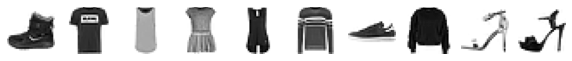

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
pd.Series(train_target).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

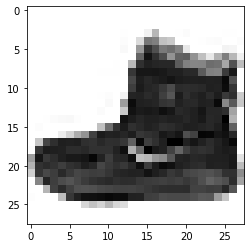

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')

In [32]:
x_train, x_test, y_train, y_test = train_input.reshape(60000,28*28), test_input.reshape(10000, 28*28),\
                                   train_target, test_target

In [27]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [ ]:
# logisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8412

In [ ]:
# deep learning

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
hist = model.fit(x_train, y_train_oh, validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
2400/2400 [==============================] - 12s 4ms/step - loss: 2.2007 - accuracy: 0.7428 - val_loss: 0.5934 - val_accuracy: 0.7958
Epoch 2/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.5785 - accuracy: 0.8063 - val_loss: 0.5113 - val_accuracy: 0.8209
Epoch 3/50
2400/2400 [==============================] - 10s 4ms/step - loss: 0.5053 - accuracy: 0.8244 - val_loss: 0.5005 - val_accuracy: 0.8163
Epoch 4/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4750 - accuracy: 0.8301 - val_loss: 0.4283 - val_accuracy: 0.8481
Epoch 5/50
2400/2400 [==============================] - 10s 4ms/step - loss: 0.4478 - accuracy: 0.8435 - val_loss: 0.4898 - val_accuracy: 0.8182
Epoch 6/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4197 - accuracy: 0.8504 - val_loss: 0.4477 - val_accuracy: 0.8393
Epoch 7/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4255 - accuracy: 0.8500 - val_loss: 0.4335 - val_accura

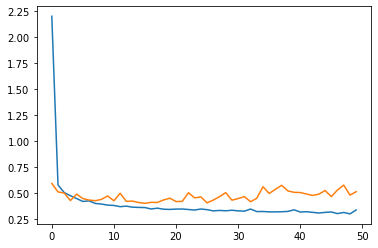

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

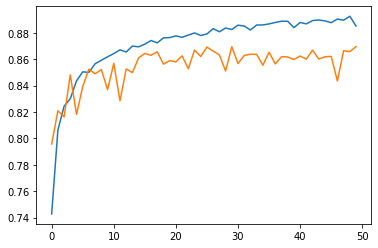

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.8479


[0.6250352263450623, 0.8478999733924866]

In [ ]:
# image matrix 데이터를 vectorizing하지 말고, matrix구조 그대로 학습 => CNN

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [33]:
x_train_cov = train_input.reshape(60000, 28, 28, 1)
x_test_cov = test_input.reshape(10000, 28, 28, 1)

In [64]:
model = Sequential()
# padding : conv되어서 나온 데이커 크기가 원본데이터 크기랑 같게 유지해줌
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_11 (Dense)            (None, 100)              

In [65]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [38]:
hist = model.fit(x_train_cov, y_train_oh, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.5647 - accuracy: 0.8120 - val_loss: 0.3696 - val_accuracy: 0.8613
Epoch 2/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3828 - accuracy: 0.8606 - val_loss: 0.3825 - val_accuracy: 0.8639
Epoch 3/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3486 - accuracy: 0.8748 - val_loss: 0.3162 - val_accuracy: 0.8838
Epoch 4/10
4800/4800 [==============================] - 27s 6ms/step - loss: 0.3238 - accuracy: 0.8824 - val_loss: 0.2953 - val_accuracy: 0.8880
Epoch 5/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3116 - accuracy: 0.8874 - val_loss: 0.3162 - val_accuracy: 0.8881
Epoch 6/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2992 - accuracy: 0.8921 - val_loss: 0.3207 - val_accuracy: 0.8833
Epoch 7/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2889 - accuracy: 0.8952 - val_loss: 0.2944 - val_ac

In [39]:
model.evaluate(x_test_cov, y_test_oh)

313/313 [==============================] - 2s 5ms/step - loss: 0.3534 - accuracy: 0.8956


[0.35336729884147644, 0.8956000208854675]

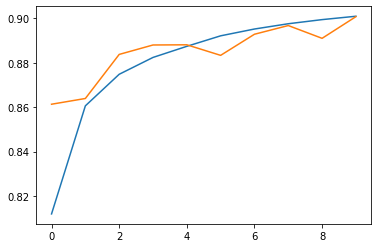

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
model.summary()

In [42]:
from tensorflow.keras import utils

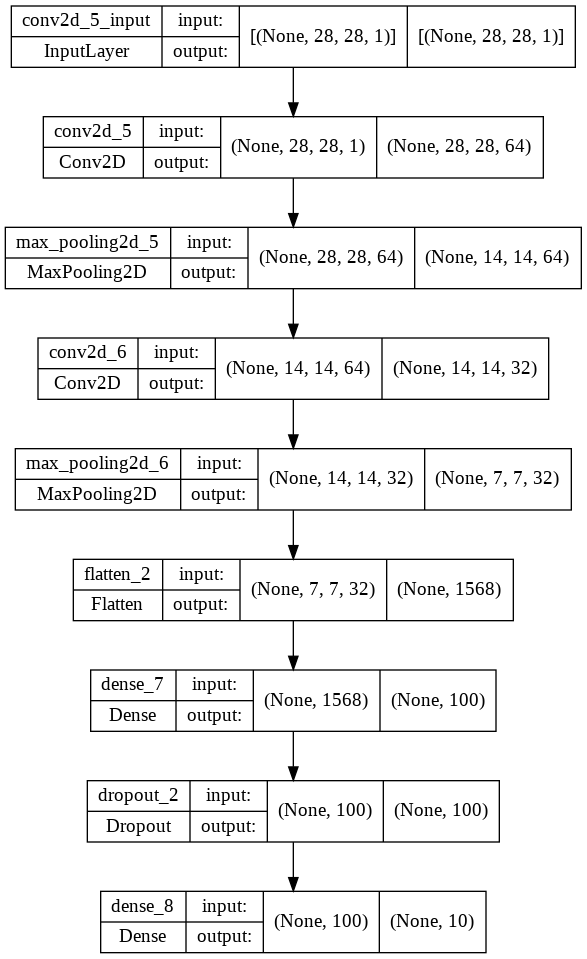

In [45]:
utils.plot_model(model, show_shapes=True)

In [66]:
# filter print
model.layers

In [67]:
model.layers[0]

In [ ]:
# filter의 가중치
model.layers[0].weights[0]

In [69]:
conv1 = model.layers[0]
conv1_weights = conv1.weights[0].numpy()

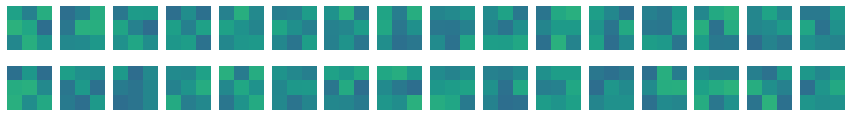

In [70]:
fig, axes = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axes[i,j].imshow(conv1_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axes[i,j].axis('off')

plt.show()

In [61]:
conv1_weights.shape

(3, 3, 1, 16)

In [71]:
# layer output print

In [72]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_9_input')>

In [74]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_9')>

In [75]:
from tensorflow.keras.models import Model

In [76]:
conv_acti = Model(model.input, model.layers[0].output)

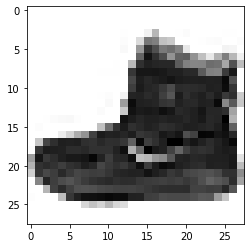

In [78]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [79]:
inputs = train_input[0].reshape(-1, 28, 28, 1)
feature_maps = conv_acti.predict(inputs)

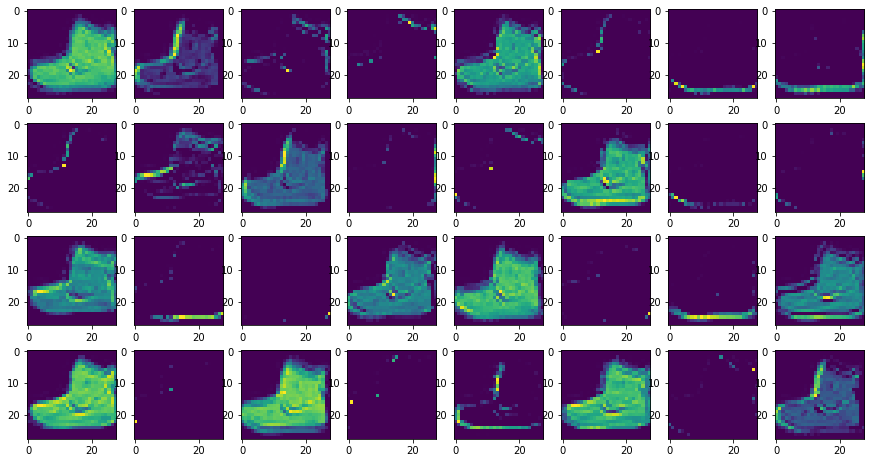

In [82]:
fig, axes = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
  for j in range(8):
    axes[i,j].imshow(feature_maps[0, :, :, i*8+j])
    axes[i,j].axis=('off')
plt.show()